# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [88]:
#  inspired from
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# https://github.com/Bsingstad/DMBA-ML/blob/main/Forelesning%202/06%20K-fold%20og%20sammenligning%20av%20modeller.ipynb
# https://github.com/Bsingstad/DMBA-ML/blob/main/Forelesning%202/07%20Repeterte%20K-fold%20for%20signifikans%20i%20sammenligning%20av%20modeller.ipynb
# https://github.com/Bsingstad/DMBA-ML/blob/main/Forelesning%202/08%20Grid%20search%20og%20sammenligning%20av%20modeller.ipynb

In [89]:
# Importer resten av pakkene du trenger her:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns  # oppgave 1.2
import numpy as np # oppgave 1.2

In [90]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

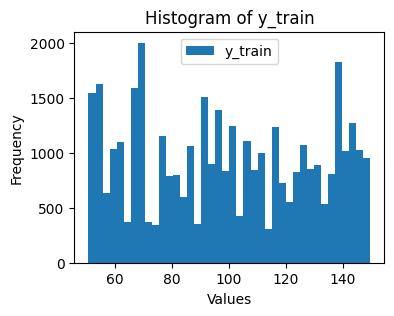

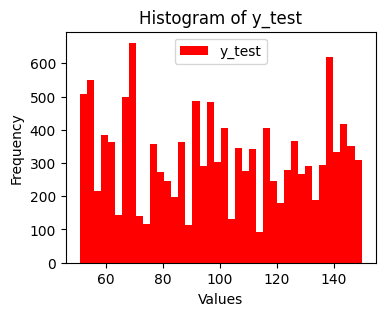

In [91]:
#TODO: visualiser y_train og y_test i et histogram 1.1 part 1
import matplotlib.pyplot as plt

# Plot a histogram for y_train
plt.figure(figsize=(4, 3))
plt.hist(y_train, bins=40, label='y_train')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of y_train')
plt.legend()
plt.show()

# Plot a histogram for y_test
plt.figure(figsize=(4, 3))
plt.hist(y_test, bins=40, color='red', label='y_test')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of y_test')
plt.legend()
plt.show()

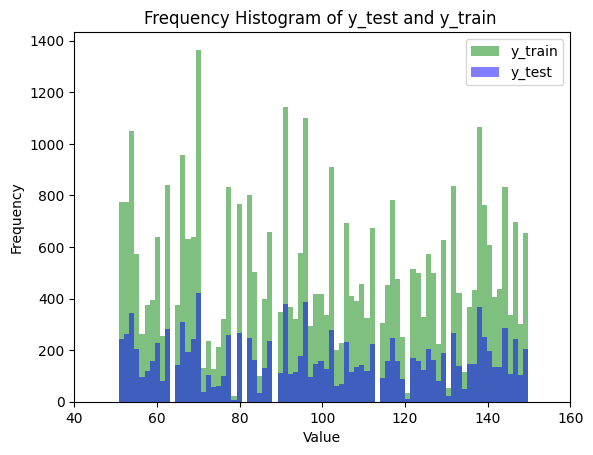

In [92]:
#TODO: visualiser y_train og y_test i et histogram 1.1 part 2
# inspired from https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/
kwargs = dict(alpha=0.5, bins=80)

plt.hist(y_train, **kwargs, color='g', label='y_train')
plt.hist(y_test, **kwargs, color='b', label='y_test')
plt.gca().set(title='Frequency Histogram of y_test and y_train ', ylabel='Frequency',xlabel='Value')
plt.xlim(40,160)
plt.legend();

**Svar:**

*<
From the histogram figures, we notice that the frequence of y_test and y_train are increasing and decreasing parallel to each other. This means that the problem that we are going to do is regression. >*


#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

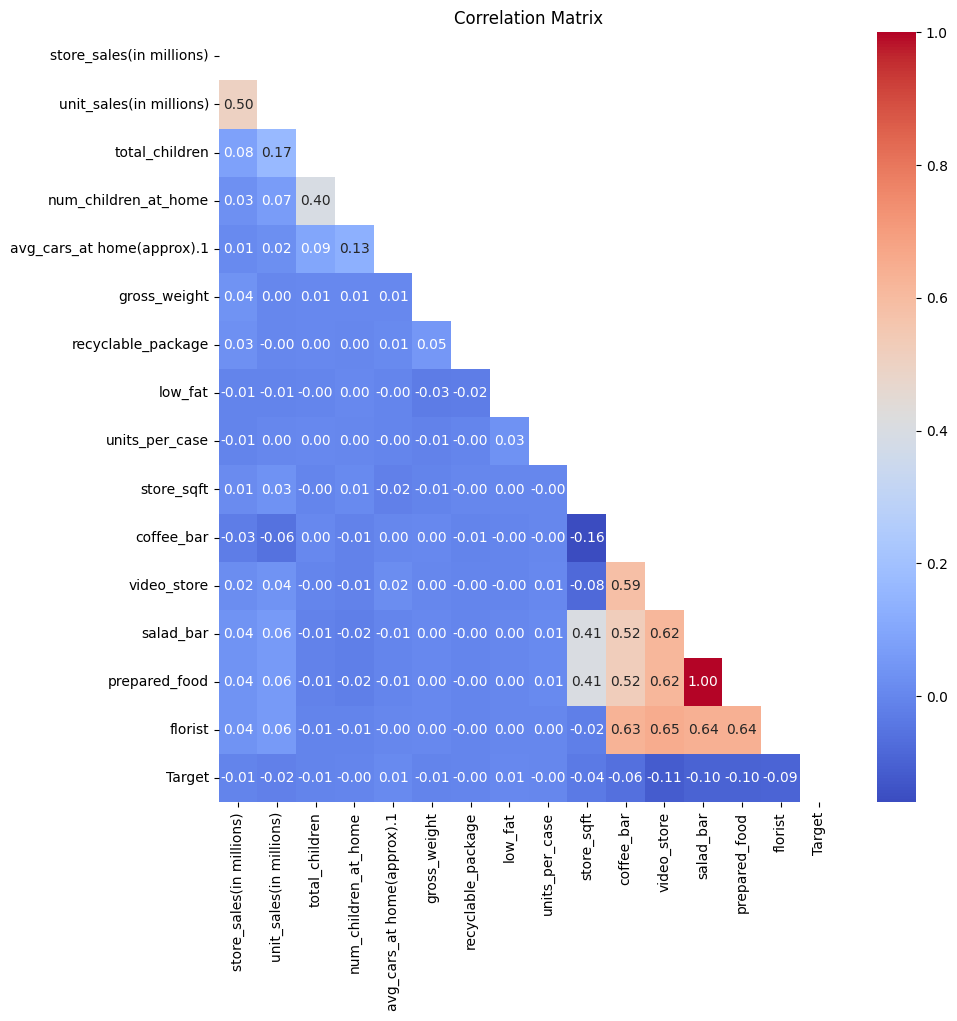

In [95]:
# 1.2
def korrelasjonsmatrise(X,y):
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp["Target"] = y_temp
    #TODO: Fullfør koden
    corr_matrix = X_temp.corr()
    # hide the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # mask is to show half matrix
   
    plt.figure(figsize=(10,10))
    #sns.heatmap(corr_matrix, annot=True) # shows basic complete matrix
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f") # shows half matrix and two decimal digits
    plt.title("Correlation Matrix")

    plt.show()
korrelasjonsmatrise(X_train,y_train) # call korrelasjonsmatrise function

**Svar:**

*< 
The most correlation is between prepared_food and salad_bar 100%.
there are also other correlations between florist and video_store 65%, florist vs salad_bar 64%, forist vs prepared_food 64%. osv....
But as the matrix shows that Target has no correlation with others!. This may mean that we have split the dataset to train and target correctly.There is no correlation between the target and the others>*



#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [100]:
#X_train.head()

In [101]:
#X_train.count()

In [102]:
#y_train.head()

In [103]:
#y_train.count()

In [104]:
# 1.3
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold, GridSearchCV

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Define the parameter grid
param_grid_ridge = {
    "alpha": [1.0, 10.0,100.0, 500.0],
    "solver": ["auto", "svd"],
    "max_iter": [100, 200, 500, 1000, 2500],
    "fit_intercept": [True, False],
    "tol": [1e-4, 1e-3]
}

# Ridge Regression model
ridge_model = Ridge()

# Perform the grid search with 3-fold cross-validation
grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge, scoring="neg_mean_squared_error", cv=rkf)

# fit the Ridge model
grid_search_ridge.fit(X_train, y_train)

# Print the best parameters and corresponding score
best_params = grid_search_ridge.best_params_
best_score = grid_search_ridge.best_score_

print("Best Parameters:", best_params)
print("Best Score (neg_mean_squared_error):", best_score)

Best Parameters: {'alpha': 100.0, 'fit_intercept': True, 'max_iter': 100, 'solver': 'auto', 'tol': 0.0001}
Best Score (neg_mean_squared_error): -886.4253554243863


**Svar:**
 
*<
### Best Parameters: {'alpha': 100.0, 'fit_intercept': True, 'max_iter': 100, 'solver': 'auto', 'tol': 0.0001}, So in the next step we need to fit the Ridge model the best parameters.

### The Mean Squared Error'  is 886.4 this is high and when I modify the variables, I get the same result 886.4.>*

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [73]:
#TODO: Utfør kryssvalidering med de optimale parameterene fra forrige oppgave og logg mean_absolute_error og mean_squared_error
# 1.4 part 1
from sklearn.metrics import mean_absolute_error
import numpy as np

# Use KFold with K = 5 , allready selected to be 5
kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Arrays to store results for each fold
mae_scores = []
mse_scores = []

# Cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the model with the best parameters from oppgave 1.3
    ridge_model = Ridge(alpha=100.0, fit_intercept=True, max_iter=100, solver='auto', tol=0.0001)
    ridge_model.fit(X_train_fold, y_train_fold)

    # Make predictions
    y_pred_fold = ridge_model.predict(X_test_fold)

    # Calculate mean absolute error "MAE" and mean squared error "MSE" for each fold
    mae_fold = mean_absolute_error(y_test_fold, y_pred_fold)
    mse_fold = mean_squared_error(y_test_fold, y_pred_fold)

    # Add results for this fold to the arrays
    mae_scores.append(mae_fold)
    mse_scores.append(mse_fold)

# Calculate mean and standard deviation for both MAE and MSE
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Print results
print("\033[1m Mean of the 'Mean Absolute Error'\033[0m :",  mean_mae, " |\033[1m Standard Deviation\033[0m:", std_mae)
print("\033[1m Mean of the 'Mean Squared Error'\033[0m  :", mean_mse, "  | \033[1m Standard Deviation\033[0m:", std_mse)


 Mean of the 'Mean Absolute Error' : 25.687471437425746  | Standard Deviation: 0.1154700832942287
 Mean of the 'Mean Squared Error'  : 886.4253554243863   |  Standard Deviation: 6.970709408294006


In [105]:
#TODO: Beregn gjennomsnitt og standard avvik for mean_absolute_error og mean_squared_error og beregn hvor stor den 
# gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent
# 1.4 part 2

# Average prediction error VS the average actual price in the training data
average_actual_price = np.mean(y_train)
average_prediction_error = mean_mae / average_actual_price * 100  # Calculate percentage

print("\033[1m Average Prediction Error VAverage Actual Price\033[0m:", average_prediction_error, "%")


 Average Prediction Error VAverage Actual Price: 25.965027650408786 %


**Svar:**
*<
## Mean Absolute Error (MAE):
### Mean: 25.69
### Standard Deviation: 0.12

## Mean Squared Error (MSE):
### Mean: 886.43
### Standard Deviation: 6.97

## Average Prediction Error Compared to Average Actual Price:
### 25.86%


### The Mean Absolute Error is around 25% which means that the model predict 25% error
### The Mean Squared Error'  is 886.4 this is high and we need to modify the variable or even choose another model.
### the accuracy is not high enough maybe because I selected a model "Ridge" from LinearRegression type.>*


#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [106]:
#TODO: Tren modellen på alle treningsdata og utfør prediksjon på testdataene
# 1.5
from sklearn.metrics import mean_absolute_error
import numpy as np


# Fit the model with the best parameters from oppgave 1.3
ridge_model = Ridge(alpha=100.0, fit_intercept=True, max_iter=100, solver='auto', tol=0.0001)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)



# Calculate mean absolute error "MAE" and mean squared error "MSE"
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


# Calculate mean and standard deviation for both MAE and MSE
mean_mae = np.mean(mae)
std_mae = np.std(mae)

mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Print results
print("\033[1m Mean of the 'Mean Absolute Error'\033[0m :",  mean_mae, " |\033[1m Standard Deviation\033[0m:", std_mae)
print("\033[1m Mean of the 'Mean Squared Error'\033[0m  :", mean_mse, "  | \033[1m Standard Deviation\033[0m:", std_mse)


 Mean of the 'Mean Absolute Error' : 25.792624638950553  | Standard Deviation: 0.0
 Mean of the 'Mean Squared Error'  : 886.4253554243863   |  Standard Deviation: 6.970709408294006


**Svar:**
*< 
### The model gives the same result as oppgave 1.4 fold5 approach.
### A higher Mean Squared Error value indicates a larger spread of errors.
### Unfortunately, the Ridge linear model is not a good choice here, but I could not choose another model because the target values are continuous. Not binaries 0 or 1, 
### Even more, I can not choose a multiclassification model because the target values are not multiclassified.

### As a final result from this oppgave 1, after spending days and nights, I learned many technical things about ML and sklearn.
### from splitting the dataset to three parts, train, validation, and test parts. then, we select a suitable model from sklearn, or even better from Tensorflow,

### then we train the model with the train data a gainst validation data. then to test the accuracy of the trained model, we do a test of the trained model against the test part.

### based on what I learned, as an example
### from https://keras.io/api/layers/activations/  , keras is integrated in Tensorflow
### We can train model using tensorflow by doing the same but in Tensorflow.
### we can select mutilayers in the model and decide the apropriate activation function in each layer.
### the last layer will be sigmoid for binary  output 0 or 1 (for example Fail or Pass) (TRUE or FALSE), Or softmax for multiclassification output (for example numbers from 0 to 9).

### my final concusion about oppgave 1, I did my best to understand what is needed (the process for doing a model in machine learning, sklearn), but the result of the chosen model is not good enough.
>*

In [107]:
#y_train

In [108]:
#X_train

In [109]:
!pip freeze > requirements.txt